In [4]:
import os
import sys
import glob
sys.path.insert(0, './')

import icenumerics as ice
import correlation_locating as coloc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import trackpy as tp
import pims as pm
from pims import pipeline
from tqdm import tqdm_notebook
import support as sp

%matplotlib inline
idx = pd.IndexSlice

ureg = ice.ureg
@pipeline
def as_gray(frame):
    red = frame[:, :, 0]
    green = frame[:, :, 1]
    blue = frame[:, :, 2]
    return 0.2125 * red + 0.7154 * green + 0.0721 * blue

from icenumerics.geometry import transformations as tr

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
## Directory where the data is located
directory = "C:/Users/aortiza/Desktop/ShearedSquare/Theta45"

## Get a list of videos in that folder
theta = 45
filenames = [file for file in glob.glob(
    os.path.join(directory,('*.avi')))]

filenames = [f for f in filenames if not (f.find("O2")>0) and not (f.find("O1")>0)]

In [55]:
theta = 45
alpha = (90-theta)/180*np.pi
nx = 7
ny = 11

particle = ice.particle()

trap = ice.trap(trap_sep = 10*ureg.um,
               height = 80*ureg.pN*ureg.nm,
               stiffness = 6e-4*ureg.pN/ureg.nm)

square_spins = ice.spins()
v = ice.vertices()

def particle_locations_to_colloids(entry):
    
    display(entry)
    square_spins.create_lattice("square",[nx,ny],lattice_constant = 30*ureg.um)
    sheared_spins = tr.shear(square_spins,alpha)

    sheared_spins = tr.rotate(sheared_spins,(entry[["angle"]].values[0])*ureg.deg)
    sheared_spins = tr.scale(sheared_spins,entry[["scale"]].values*np.array([1,1]))
    sheared_spins = tr.translate(sheared_spins,entry[["x_offset","y_offset"]].values*ureg.um)
    
    col = ice.colloidal_ice(sheared_spins, particle, trap, height_spread = 0, susceptibility_spread = 0.1)
    
    return col

In [56]:
parameters = pd.read_csv(os.path.join(directory,"parameters.dat"),sep = "\t", index_col = [0])

In [57]:
def strip_name(name,ext): 
    name = os.path.split(name)[-1]
    return name[:name.find(ext)]

parameters["basename"] = [strip_name(name,"_tracking.dat") for name in parameters.name]
parameters = parameters.set_index(["basename"])

name        /Users/Eric/Desktop/TFM/Data_shearedsquare/tet...
scale                                                     2.6
x_offset                                                  621
y_offset                                                   -9
nx                                                          7
ny                                                          8
angle                                                    89.2
Name: E5_M8_teta45_10um_2019_06_04_15_32_20, dtype: object

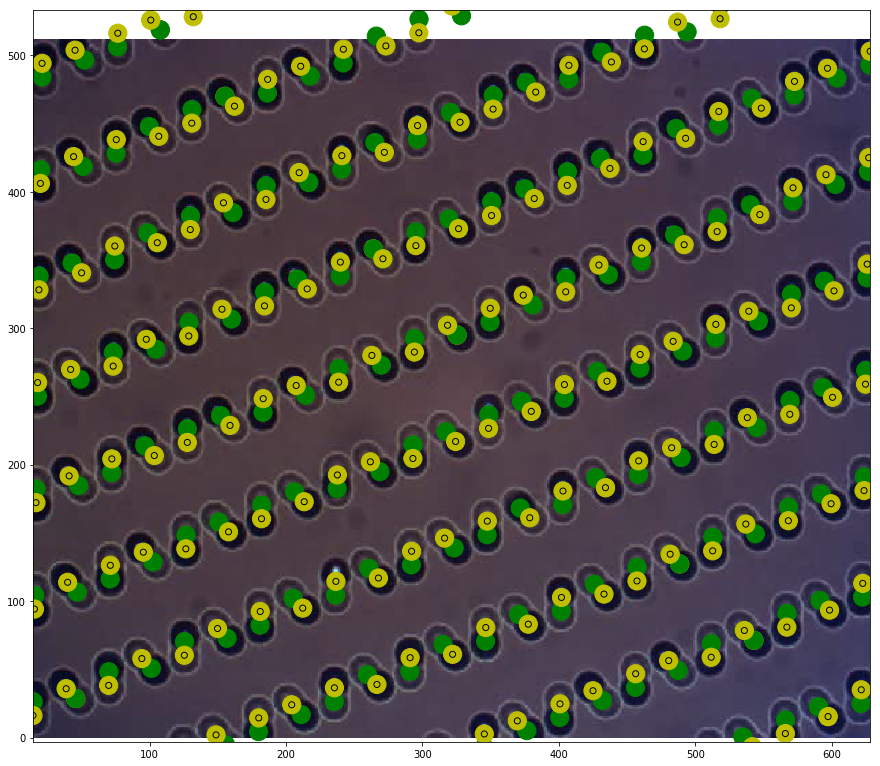

In [66]:
i = 0

fname = filenames[i]
basename = strip_name(fname,".avi")

parameters.loc[basename,"x_offset"] = 621
parameters.loc[basename,"y_offset"] = -9

fig, ax = plt.subplots(1,1,figsize=(15,15))

video = pm.open(fname)
col = particle_locations_to_colloids(parameters.loc[basename])

ax.imshow(video[0])
col.display(ax)

name        /Users/Eric/Desktop/TFM/Data_shearedsquare/tet...
scale                                                     2.6
x_offset                                                  619
y_offset                                                  -12
nx                                                          7
ny                                                          8
angle                                                    89.2
Name: E5_M8_teta45_10um_2019_06_04_16_15_15, dtype: object

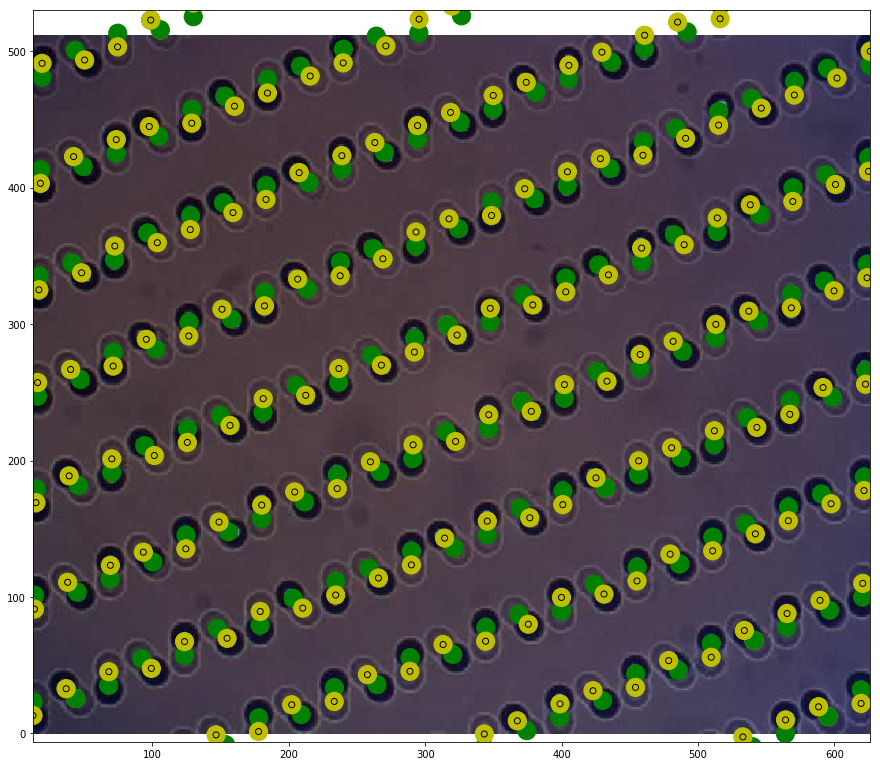

In [70]:
i = 1

fname = filenames[i]
basename = strip_name(fname,".avi")

parameters.loc[basename,"x_offset"] = 619
parameters.loc[basename,"y_offset"] = -12

fig, ax = plt.subplots(1,1,figsize=(15,15))

video = pm.open(fname)
col = particle_locations_to_colloids(parameters.loc[basename])

ax.imshow(video[0])
col.display(ax)

name        /Users/Eric/Desktop/TFM/Data_shearedsquare/tet...
scale                                                     2.6
x_offset                                                  618
y_offset                                                   -9
nx                                                          7
ny                                                          8
angle                                                    89.2
Name: E5_M8_teta45_10um_2019_06_04_16_38_13, dtype: object

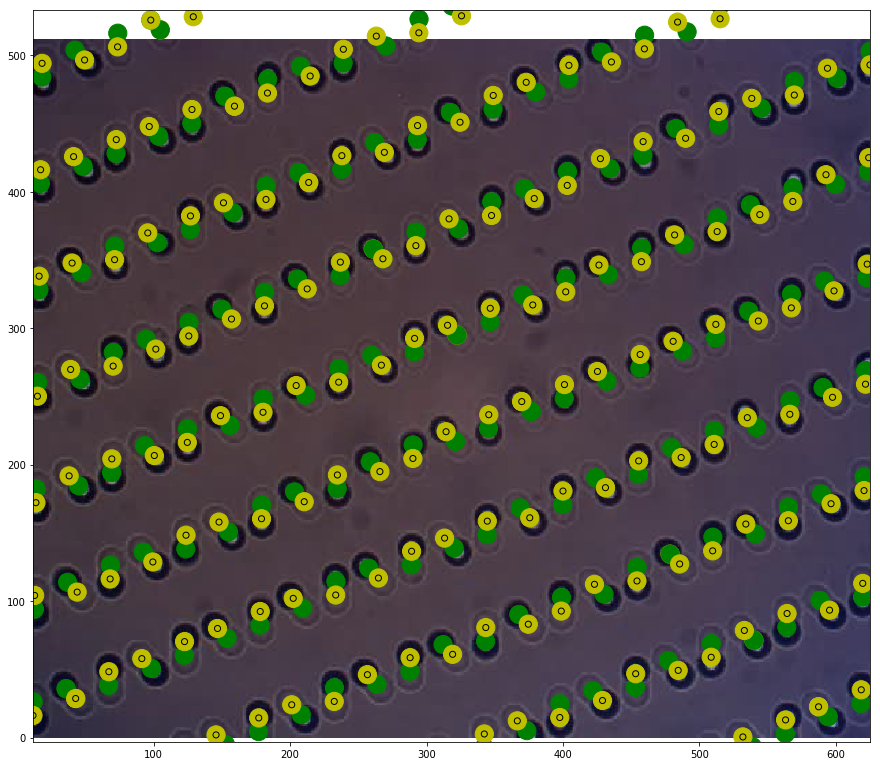

In [85]:
i = 2

fname = filenames[i]
basename = strip_name(fname,".avi")

parameters.loc[basename,"x_offset"] = 618
parameters.loc[basename,"y_offset"] = -9
parameters.loc[basename,"angle"] = 89.2

fig, ax = plt.subplots(1,1,figsize=(15,15))

video = pm.open(fname)
col = particle_locations_to_colloids(parameters.loc[basename])

ax.imshow(video[0])
col.display(ax)

name        /Users/Eric/Desktop/TFM/Data_shearedsquare/tet...
scale                                                     2.6
x_offset                                                  623
y_offset                                                  -12
nx                                                          7
ny                                                          8
angle                                                    89.2
Name: E5_M8_teta45_10um_2019_06_04_17_10_34, dtype: object

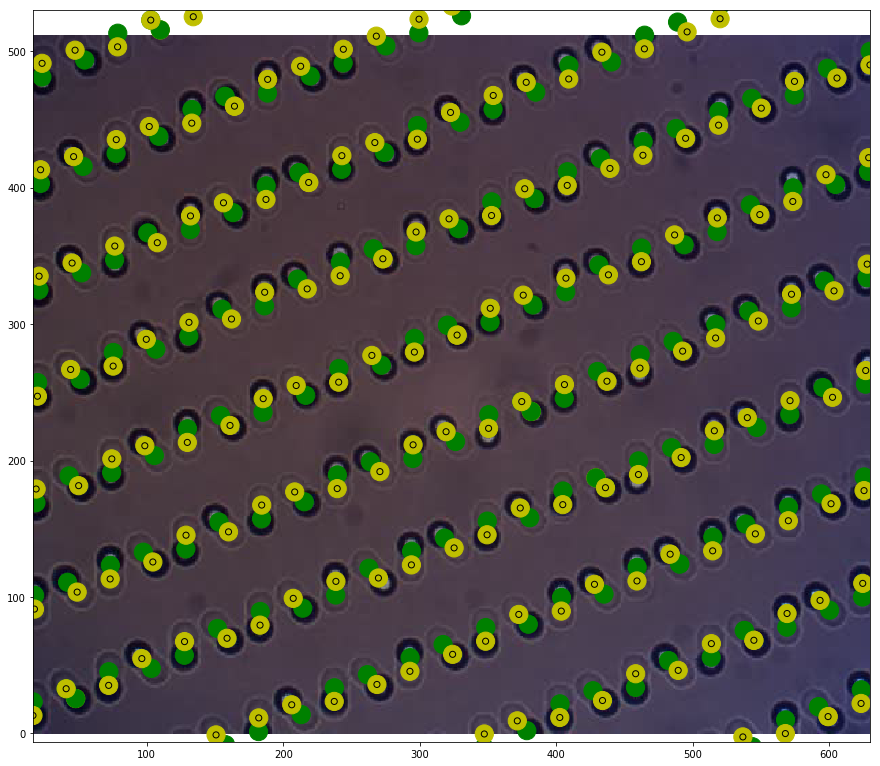

In [92]:
i = 3

fname = filenames[i]
basename = strip_name(fname,".avi")

parameters.loc[basename,"x_offset"] = 623
parameters.loc[basename,"y_offset"] = -12
parameters.loc[basename,"angle"] = 89.2

fig, ax = plt.subplots(1,1,figsize=(15,15))

video = pm.open(fname)
col = particle_locations_to_colloids(parameters.loc[basename])

ax.imshow(video[0])
col.display(ax)

name        /Users/Eric/Desktop/TFM/Data_shearedsquare/tet...
scale                                                     2.6
x_offset                                                  623
y_offset                                                   -8
nx                                                          7
ny                                                          8
angle                                                    89.2
Name: E5_M8_teta45_10um_2019_06_04_17_37_03, dtype: object

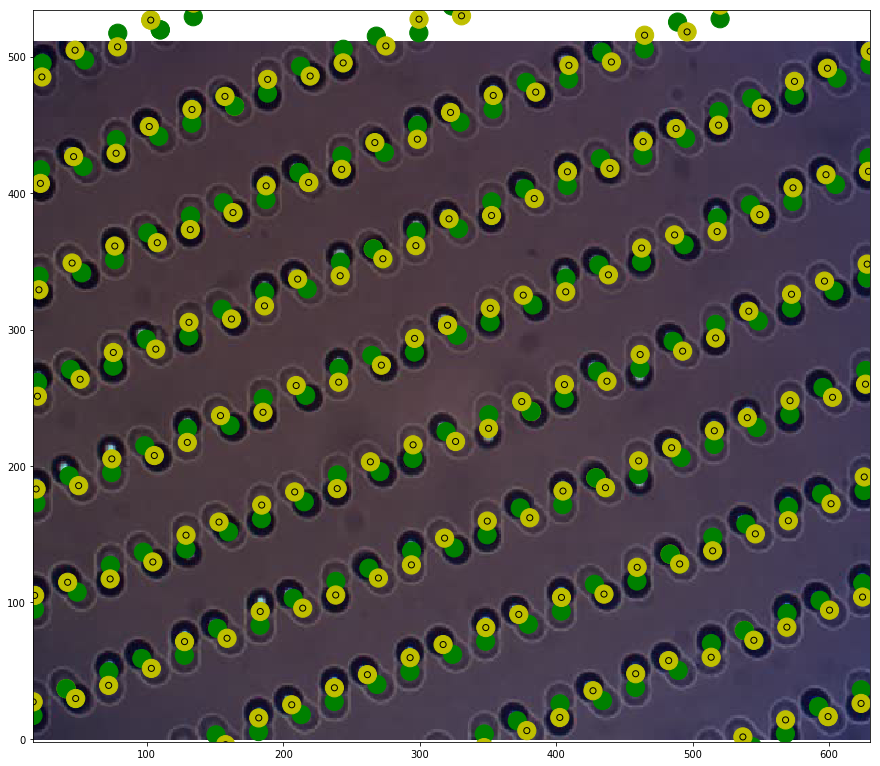

In [96]:
i = 4

fname = filenames[i]
basename = strip_name(fname,".avi")

parameters.loc[basename,"x_offset"] = 623
parameters.loc[basename,"y_offset"] = -8
parameters.loc[basename,"angle"] = 89.2

fig, ax = plt.subplots(1,1,figsize=(15,15))

video = pm.open(fname)
col = particle_locations_to_colloids(parameters.loc[basename])

ax.imshow(video[0])
col.display(ax)

name        /Users/Eric/Desktop/TFM/Data_shearedsquare/tet...
scale                                                     2.6
x_offset                                                  620
y_offset                                                  -13
nx                                                          7
ny                                                          8
angle                                                    89.2
Name: E5_M8_teta45_10um_2019_06_05_15_22_05, dtype: object

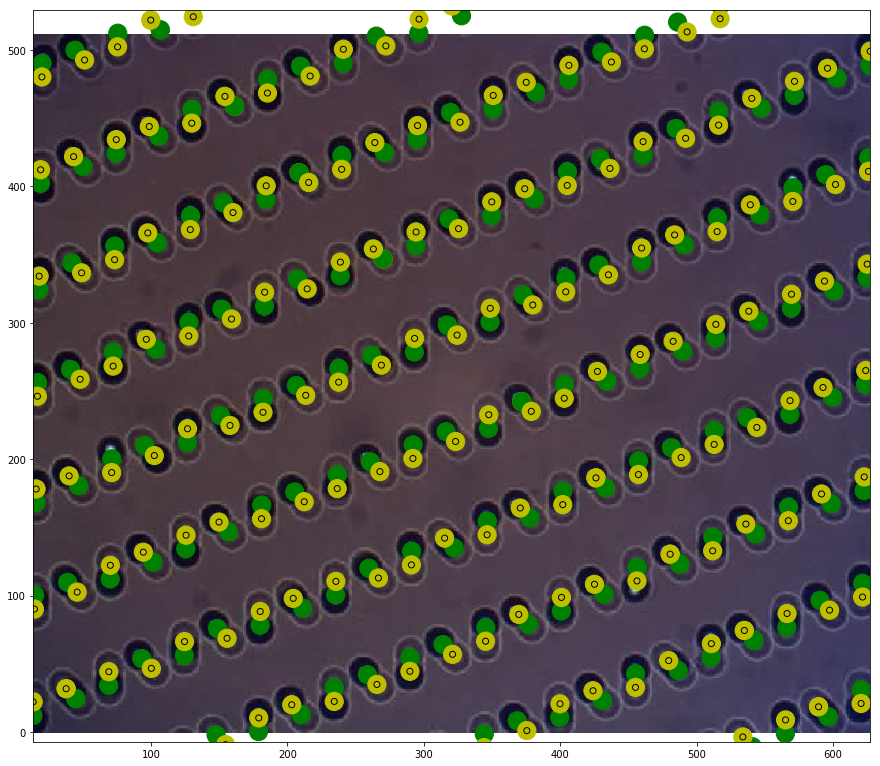

In [99]:
i = 5

fname = filenames[i]
basename = strip_name(fname,".avi")

parameters.loc[basename,"x_offset"] = 620
parameters.loc[basename,"y_offset"] = -13
parameters.loc[basename,"angle"] = 89.2

fig, ax = plt.subplots(1,1,figsize=(15,15))

video = pm.open(fname)
col = particle_locations_to_colloids(parameters.loc[basename])

ax.imshow(video[0])
col.display(ax)

name        /Users/Eric/Desktop/TFM/Data_shearedsquare/tet...
scale                                                     2.6
x_offset                                                  620
y_offset                                                  -12
nx                                                          7
ny                                                          8
angle                                                    89.2
Name: E5_M8_teta45_10um_2019_06_05_15_46_52, dtype: object

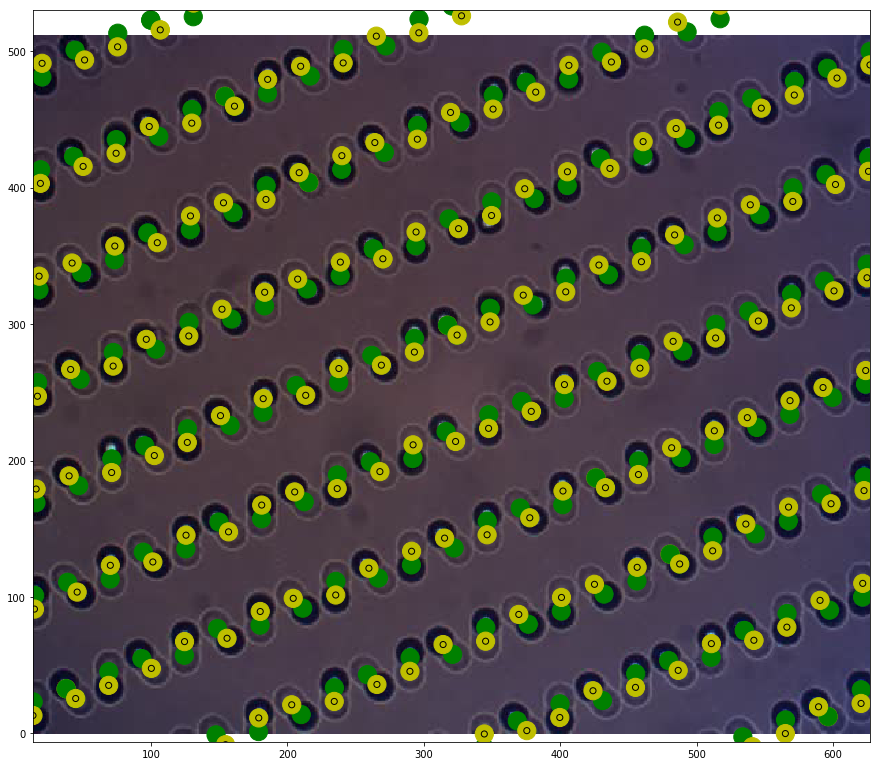

In [103]:
i = 6

fname = filenames[i]
basename = strip_name(fname,".avi")

parameters.loc[basename,"x_offset"] = 620
parameters.loc[basename,"y_offset"] = -12
parameters.loc[basename,"angle"] = 89.2

fig, ax = plt.subplots(1,1,figsize=(15,15))

video = pm.open(fname)
col = particle_locations_to_colloids(parameters.loc[basename])

ax.imshow(video[0])
col.display(ax)

name        /Users/Eric/Desktop/TFM/Data_shearedsquare/tet...
scale                                                     2.6
x_offset                                                  621
y_offset                                                   -7
nx                                                          7
ny                                                          8
angle                                                    89.2
Name: E5_M8_teta45_10um_2019_06_05_16_12_51, dtype: object

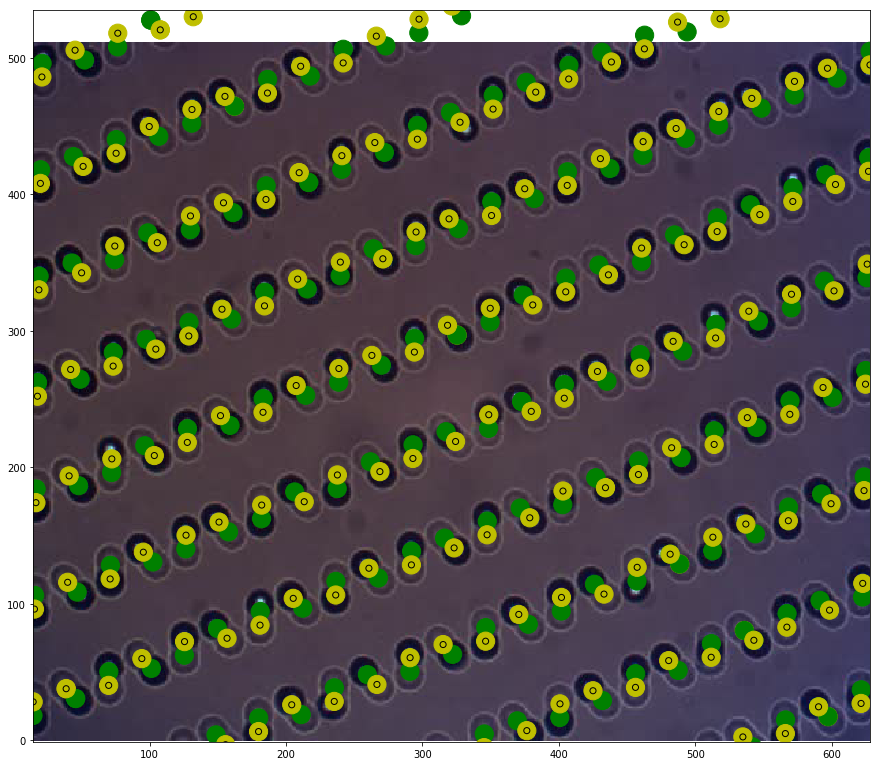

In [109]:
i = 7

fname = filenames[i]
basename = strip_name(fname,".avi")

parameters.loc[basename,"x_offset"] = 621
parameters.loc[basename,"y_offset"] = -7
parameters.loc[basename,"angle"] = 89.2

fig, ax = plt.subplots(1,1,figsize=(15,15))

video = pm.open(fname)
col = particle_locations_to_colloids(parameters.loc[basename])

ax.imshow(video[0])
col.display(ax)

name        /Users/Eric/Desktop/TFM/Data_shearedsquare/tet...
scale                                                     2.6
x_offset                                                  622
y_offset                                                   -6
nx                                                          7
ny                                                          8
angle                                                    89.2
Name: E5_M8_teta45_10um_2019_06_05_16_39_38, dtype: object

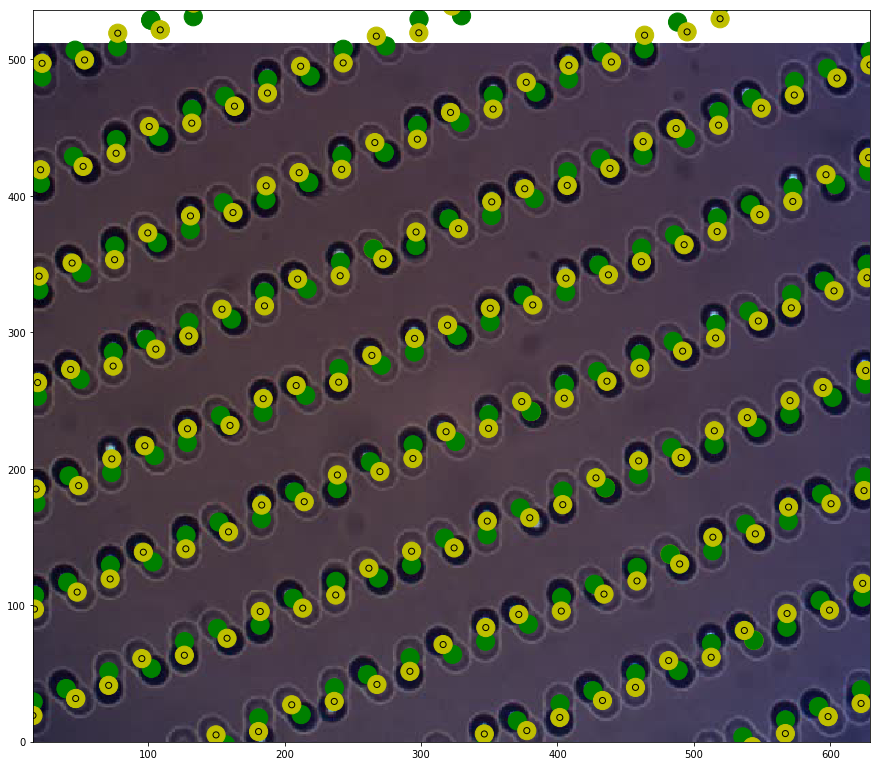

In [111]:
i = 8

fname = filenames[i]
basename = strip_name(fname,".avi")

parameters.loc[basename,"x_offset"] = 622
parameters.loc[basename,"y_offset"] = -6
parameters.loc[basename,"angle"] = 89.2

fig, ax = plt.subplots(1,1,figsize=(15,15))

video = pm.open(fname)
col = particle_locations_to_colloids(parameters.loc[basename])

ax.imshow(video[0])
col.display(ax)

name        /Users/Eric/Desktop/TFM/Data_shearedsquare/tet...
scale                                                     2.6
x_offset                                                  621
y_offset                                                   -8
nx                                                          7
ny                                                          8
angle                                                    89.2
Name: E5_M8_teta45_10um_2019_06_05_17_02_14, dtype: object

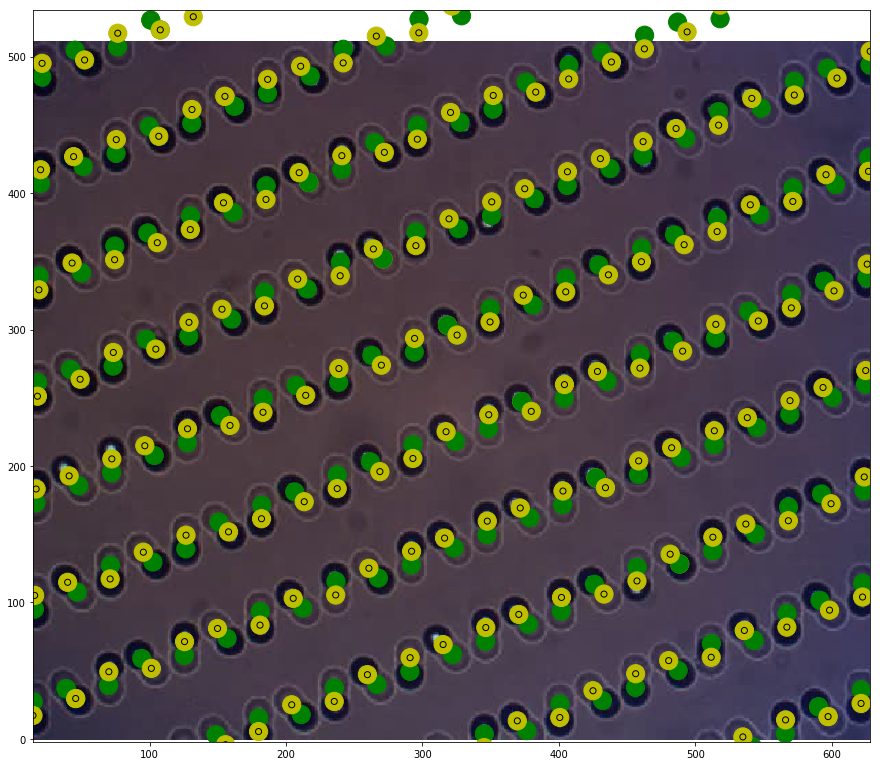

In [114]:
i = 9

fname = filenames[i]
basename = strip_name(fname,".avi")

parameters.loc[basename,"x_offset"] = 621
parameters.loc[basename,"y_offset"] = -8
parameters.loc[basename,"angle"] = 89.2

fig, ax = plt.subplots(1,1,figsize=(15,15))

video = pm.open(fname)
col = particle_locations_to_colloids(parameters.loc[basename])

ax.imshow(video[0])
col.display(ax)

In [117]:
parameters.to_csv(os.path.join(directory,"parameters.dat"), sep = "\t")